'NimbusRoman-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


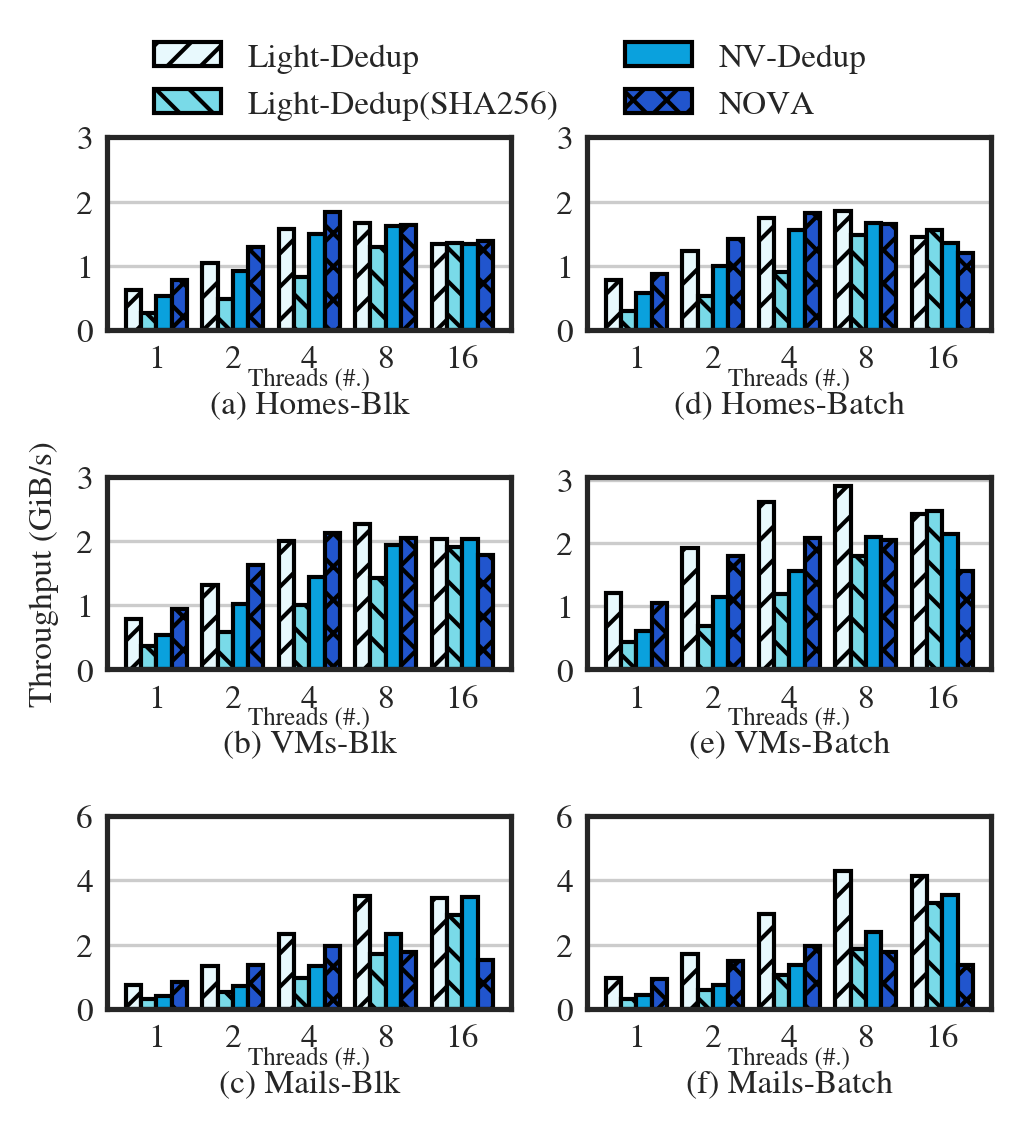

In [6]:
# ipython -c "%run plot.ipynb"

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd

# Paper specific settings
STANDARD_WIDTH = 17.8
SINGLE_COL_WIDTH = STANDARD_WIDTH / 2
DOUBLE_COL_WIDTH = STANDARD_WIDTH
def cm_to_inch(value):
    return value/2.54
    
# matplotlib style settings
matplotlib.rcParams['text.usetex'] = False
style.use('seaborn-white')
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.grid.axis"] = "y"
plt.rcParams["grid.linewidth"] = 0.8
plt.rcParams["font.family"] = "Nimbus Roman"
pd.options.display.max_columns = None
pd.options.display.max_rows = None


# Data Preprocessing
with open("./performance-comparison-table", "r") as f:
# with open("./performance-comparison-table-append", "r") as f:
    df = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')

# Plotting Settings
fig = plt.figure(dpi = 300, figsize = (cm_to_inch(SINGLE_COL_WIDTH), cm_to_inch(9)))
bar_width = 0.2
subfig_titles_blk = ["(a) Homes-Blk", "(b) VMs-Blk", "(c) Mails-Blk"]
subfig_titles_real = ["(d) Homes-Batch", "(e) VMs-Batch", "(f) Mails-Batch"]
patterns = ['///', '\\\\\\', '', 'XXX']
# Reference: https://designbro.com/blog/inspiration/color-combinations/
colors = ["#E8F9FD", "#79DAE8", "#0AA1DD", "#2155CD"]
traces = ["homes-110108-112108.1-21.blkparse", "webmail+online.cs.fiu.edu-110108-113008.1-21.blkparse", "cheetah.cs.fiu.edu-110108-113008.1-2.blkparse"]
cblks = [ 1, 512 ]

for i in range(2):
    for j in range(3):
        subfig = plt.subplot(3, 2, i + 1 + 2 * j)
        trace = traces[j]
        x = [1, 2, 3, 4, 5]
        x_label = df['job'].drop_duplicates().reset_index().drop(columns=['index'])['job']
        fss = df['file_system'].drop_duplicates().reset_index().drop(columns=['index'])['file_system']
        tot = len(fss) * bar_width
        for idx, fs in enumerate(fss):
            points = []
            for pivot in x:
                point = pivot - tot / 2 + bar_width / 2 + idx * bar_width
                points.append(point)
            plt.bar(points, df[(df['file_system'] == fs) & (df['cblks'] == cblks[i]) & (df['trace'] == trace)]['bandwidth(MiB/s)'] / 1024, width=bar_width, hatch=patterns[idx], edgecolor='black', color=colors[idx])
            plt.xticks(x, labels=x_label, fontsize=8)

        # Draw title
        subfig.text(0.5, -0.25, "Threads (#.)", ha='center', va='center', fontsize=6, transform=subfig.transAxes)
        if i == 0 and j == 1:
            plt.ylabel('Throughput (GiB/s)', fontsize=8)
        if (j != 2):
            plt.yticks([0, 1, 2, 3], fontsize=8)
        else:
            plt.yticks([0, 2, 4, 6], fontsize=8)

        if i == 0:
            plt.xlabel(subfig_titles_blk[j], labelpad = 4, fontsize=8)
        else:
            plt.xlabel(subfig_titles_real[j], labelpad = 4, fontsize=8)

            
fig.legend(fss, loc='center', bbox_to_anchor=(0.5, 1), ncol=2, fontsize=8)
plt.tight_layout()
plt.savefig("./FIG-Trace.pdf", bbox_inches='tight', pad_inches=0)
